### 레드 or  화이트 와인 예측을 위한 딥러닝

#### ModelCheckpoint와 EarlyStopping callback 함수를 이용

In [1]:
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import ModelCheckpoint, EarlyStopping

import tensorflow as tf
import pandas as pd
import numpy as np
import os

Using TensorFlow backend.


In [2]:
np.random.seed(3)
tf.random.set_seed(3)

In [3]:
df_pre = pd.read_csv('./dataset/wine.csv', header=None)
df_pre

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,0
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,0
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,0
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,0


#### * 데이터셋 중에서 일부만을 선택해서 사용하는 방식

#### sample( ) 함수 : 원본 데이터에서 정해진 비율만큼 랜덤으로 뽑아오는 함수

sample( ) 함수를 사용하여 원본 데이터의 몇 %를 사용할지를 결정한다.  
frac = 1 이라고 지정하면 원본 데이터의 100% 를 불러오라는 의미이다.

In [4]:
df = df_pre.sample(frac=0.15)  # sample(fran=%) : 몇 퍼센트로 뽑아서 셔플 할 것인지
df

,0,1,2,3,4,5,6,7,8,9,10,11,12
6245,5.9,0.180,0.28,1.00,0.037,24.0,88.0,0.99094,3.29,0.55,10.65,7,0
486,10.2,0.670,0.39,1.90,0.054,6.0,17.0,0.99760,3.17,0.47,10.00,5,1
273,8.4,0.715,0.20,2.40,0.076,10.0,38.0,0.99735,3.31,0.64,9.40,5,1
1993,6.8,0.370,0.51,11.80,0.044,62.0,163.0,0.99760,3.19,0.44,8.80,5,0
885,8.9,0.750,0.14,2.50,0.086,9.0,30.0,0.99824,3.34,0.64,10.50,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
213,8.2,0.570,0.26,2.20,0.060,28.0,65.0,0.99590,3.30,0.43,10.10,5,1
2584,6.0,0.410,0.21,1.90,0.050,29.0,122.0,0.99280,3.42,0.52,10.50,6,0
4446,5.8,0.200,0.34,1.00,0.035,40.0,86.0,0.98993,3.50,0.42,11.70,5,0
3471,5.8,0.330,0.20,16.05,0.047,26.0,166.0,0.99760,3.09,0.46,8.90,5,0


In [5]:
dataset = df.values
dataset

array([[ 5.9  ,  0.18 ,  0.28 , ..., 10.65 ,  7.   ,  0.   ],
       [10.2  ,  0.67 ,  0.39 , ..., 10.   ,  5.   ,  1.   ],
       [ 8.4  ,  0.715,  0.2  , ...,  9.4  ,  5.   ,  1.   ],
       ...,
       [ 5.8  ,  0.2  ,  0.34 , ..., 11.7  ,  5.   ,  0.   ],
       [ 5.8  ,  0.33 ,  0.2  , ...,  8.9  ,  5.   ,  0.   ],
       [ 6.2  ,  0.47 ,  0.21 , ...,  9.2  ,  5.   ,  0.   ]])

In [6]:
X = dataset[:,0:12]
Y = dataset[:,12]
X

array([[ 5.9  ,  0.18 ,  0.28 , ...,  0.55 , 10.65 ,  7.   ],
       [10.2  ,  0.67 ,  0.39 , ...,  0.47 , 10.   ,  5.   ],
       [ 8.4  ,  0.715,  0.2  , ...,  0.64 ,  9.4  ,  5.   ],
       ...,
       [ 5.8  ,  0.2  ,  0.34 , ...,  0.42 , 11.7  ,  5.   ],
       [ 5.8  ,  0.33 ,  0.2  , ...,  0.46 ,  8.9  ,  5.   ],
       [ 6.2  ,  0.47 ,  0.21 , ...,  0.46 ,  9.2  ,  5.   ]])

In [7]:
model = Sequential()
model.add(Dense(30, input_dim=12, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [8]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [9]:
MODEL_DIR = './model_save(1)/'

In [10]:
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)

#### model.fit() 으로 실행하기 전 환경 설정
● filepath
모델을 저장할 경로를 입력합니다.
추가 설명으로 만약 monitor가 val_loss일 때,
모델 경로를 '{epoch:02d}-{val_loss:.4f}.hdf5' 라고 입력하면,
에폭-해당에폭에서의 val_loss.hdf5로 모델이 저장됩니다. 예: 01-0.3912.hdf5 로 저장됩니다.

● monitor
모델을 저장할 때, 기준이 되는 값을 지정합니다.
예를 들어, validation set의 loss가 가장 작을 때 저장하고 싶으면 'val_loss'를 입력하고
만약 train set의 loss가 가장 작을 때 모델을 저장하고 싶으면 'loss'를 입력합니다.
이 외에도 다양한 값들을 기준으로 삼을 수 있습니다.

● verbose
0, 1

1일 경우 모델이 저장 될 때, 'saving model to ...' 라고 화면에 표시되고,
0일 경우 화면에 표시되는 것 없이 그냥 바로 모델이 저장됩니다.

● save_best_only
True, False

True 인 경우, monitor 되고 있는 값을 기준으로 가장 좋은 값으로 모델이 저장됩니다.
False인 경우, 매 에폭마다 모델이 filepath{epoch}으로 저장됩니다. (model0, model1, model2....)

● save_weights_only
True, False

True인 경우, 모델의 weights만 저장됩니다.
False인 경우, 모델 레이어 및 weights 모두 저장됩니다.

● mode
'auto', 'min', 'max'

val_acc 인 경우, 정확도이기 때문에 클수록 좋습니다. 따라서 이때는 max를 입력해줘야합니다.
만약 val_loss 인 경우, loss 값이기 때문에 값이 작을수록 좋습니다. 따라서 이때는 min을 입력해줘야합니다.
auto로 할 경우, 모델이 알아서 min, max를 판단하여 모델을 저장합니다.

● save_freq
'epoch' 또는 integer(정수형 숫자)

'epoch'을 사용할 경우, 매 에폭마다 모델이 저장됩니다.
integer을 사용할 경우, 숫자만큼의 배치를 진행되면 모델이 저장됩니다.
예를 들어 숫자 8을 입력하면, 8번째 배치가 train 된 이후, 16번째 배치가 train 된 이후 ..... 모델이 저장됩니다.

#### ModelCheckpoint() 함수를 이용한 모델 업데이트 과정 저장을 위한 환경 설정
파일명에 epoch와 val_loss를 기록하도록 설정

In [11]:
modelpath="./model_save(1)/{epoch:02d}-{val_loss:.4f}.hdf5"    # val_loss 저장됨

In [12]:
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='loss', verbose=1, save_best_only=True)

#### EarlyStopping() 함수를 이용한 학습 중단을 위한 환경 설정
아래와 같이 EarlyStopping( ) 함수를 이용한 학습 중단을 위한 환경을 설정할 수 있다.  
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=100)  
  
● patience 부분
monitor에 설정한 부분이 좋아지지 않아도 몇 번까지 기다릴지를 정하는 숫자  
patience=100 경우, monitor에 설정한 부분이 100번까지 성능이 좋아지지 않으면 학습을 멈춘다는 뜻  
    
#### 모델 실행
#### model.fit() 옵션에  callbacks=[checkpointer, early_stopping_callback] 콜백함수를 사용하여 
#### 모델 업데이트 과정을 저장하고, 성능이 좋아지지 않으면 학습을 중단한다.
#### 또한 validation_split를 사용하여 홀드 아웃 교차 검증(Holdout Cross Validation)을 사용

In [13]:
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=100)

In [14]:
history = model.fit(X, Y, validation_split=0.2, epochs=3000, batch_size=500, verbose=2, 
                    callbacks=[checkpointer,early_stopping_callback])

Train on 780 samples, validate on 195 samples
Epoch 1/3000
 - 1s - loss: 1.2415 - accuracy: 0.7256 - val_loss: 0.7791 - val_accuracy: 0.7744

Epoch 00001: loss improved from inf to 1.24155, saving model to ./model_save(1)/01-0.7791.hdf5
Epoch 2/3000
 - 0s - loss: 1.0532 - accuracy: 0.7256 - val_loss: 0.6566 - val_accuracy: 0.7744

Epoch 00002: loss improved from 1.24155 to 1.05320, saving model to ./model_save(1)/02-0.6566.hdf5
Epoch 3/3000
 - 0s - loss: 0.8796 - accuracy: 0.7256 - val_loss: 0.5557 - val_accuracy: 0.7744

Epoch 00003: loss improved from 1.05320 to 0.87956, saving model to ./model_save(1)/03-0.5557.hdf5
Epoch 4/3000
 - 0s - loss: 0.7424 - accuracy: 0.7256 - val_loss: 0.4743 - val_accuracy: 0.7744

Epoch 00004: loss improved from 0.87956 to 0.74243, saving model to ./model_save(1)/04-0.4743.hdf5
Epoch 5/3000
 - 0s - loss: 0.6306 - accuracy: 0.7256 - val_loss: 0.4092 - val_accuracy: 0.7744

Epoch 00005: loss improved from 0.74243 to 0.63058, saving model to ./model_save(1


Epoch 00043: loss improved from 0.32726 to 0.32556, saving model to ./model_save(1)/43-0.2569.hdf5
Epoch 44/3000
 - 0s - loss: 0.3239 - accuracy: 0.9051 - val_loss: 0.2556 - val_accuracy: 0.9128

Epoch 00044: loss improved from 0.32556 to 0.32388, saving model to ./model_save(1)/44-0.2556.hdf5
Epoch 45/3000
 - 0s - loss: 0.3222 - accuracy: 0.9051 - val_loss: 0.2544 - val_accuracy: 0.9179

Epoch 00045: loss improved from 0.32388 to 0.32217, saving model to ./model_save(1)/45-0.2544.hdf5
Epoch 46/3000
 - 0s - loss: 0.3205 - accuracy: 0.9038 - val_loss: 0.2538 - val_accuracy: 0.9282

Epoch 00046: loss improved from 0.32217 to 0.32053, saving model to ./model_save(1)/46-0.2538.hdf5
Epoch 47/3000
 - 0s - loss: 0.3188 - accuracy: 0.9051 - val_loss: 0.2527 - val_accuracy: 0.9333

Epoch 00047: loss improved from 0.32053 to 0.31883, saving model to ./model_save(1)/47-0.2527.hdf5
Epoch 48/3000
 - 0s - loss: 0.3170 - accuracy: 0.9051 - val_loss: 0.2508 - val_accuracy: 0.9385

Epoch 00048: loss i


Epoch 00085: loss improved from 0.26172 to 0.25980, saving model to ./model_save(1)/85-0.1995.hdf5
Epoch 86/3000
 - 0s - loss: 0.2584 - accuracy: 0.9295 - val_loss: 0.1991 - val_accuracy: 0.9487

Epoch 00086: loss improved from 0.25980 to 0.25841, saving model to ./model_save(1)/86-0.1991.hdf5
Epoch 87/3000
 - 0s - loss: 0.2571 - accuracy: 0.9295 - val_loss: 0.1984 - val_accuracy: 0.9436

Epoch 00087: loss improved from 0.25841 to 0.25715, saving model to ./model_save(1)/87-0.1984.hdf5
Epoch 88/3000
 - 0s - loss: 0.2560 - accuracy: 0.9321 - val_loss: 0.1975 - val_accuracy: 0.9436

Epoch 00088: loss improved from 0.25715 to 0.25596, saving model to ./model_save(1)/88-0.1975.hdf5
Epoch 89/3000
 - 0s - loss: 0.2548 - accuracy: 0.9333 - val_loss: 0.1957 - val_accuracy: 0.9487

Epoch 00089: loss improved from 0.25596 to 0.25477, saving model to ./model_save(1)/89-0.1957.hdf5
Epoch 90/3000
 - 0s - loss: 0.2535 - accuracy: 0.9321 - val_loss: 0.1934 - val_accuracy: 0.9487

Epoch 00090: loss i

 - 0s - loss: 0.2204 - accuracy: 0.9410 - val_loss: 0.1661 - val_accuracy: 0.9538

Epoch 00127: loss improved from 0.22078 to 0.22044, saving model to ./model_save(1)/127-0.1661.hdf5
Epoch 128/3000
 - 0s - loss: 0.2194 - accuracy: 0.9410 - val_loss: 0.1661 - val_accuracy: 0.9538

Epoch 00128: loss improved from 0.22044 to 0.21943, saving model to ./model_save(1)/128-0.1661.hdf5
Epoch 129/3000
 - 0s - loss: 0.2188 - accuracy: 0.9410 - val_loss: 0.1664 - val_accuracy: 0.9487

Epoch 00129: loss improved from 0.21943 to 0.21880, saving model to ./model_save(1)/129-0.1664.hdf5
Epoch 130/3000
 - 0s - loss: 0.2182 - accuracy: 0.9423 - val_loss: 0.1667 - val_accuracy: 0.9487

Epoch 00130: loss improved from 0.21880 to 0.21822, saving model to ./model_save(1)/130-0.1667.hdf5
Epoch 131/3000
 - 0s - loss: 0.2176 - accuracy: 0.9410 - val_loss: 0.1657 - val_accuracy: 0.9487

Epoch 00131: loss improved from 0.21822 to 0.21764, saving model to ./model_save(1)/131-0.1657.hdf5
Epoch 132/3000
 - 0s - lo


Epoch 00169: loss did not improve from 0.19774
Epoch 170/3000
 - 0s - loss: 0.1973 - accuracy: 0.9462 - val_loss: 0.1496 - val_accuracy: 0.9590

Epoch 00170: loss improved from 0.19774 to 0.19730, saving model to ./model_save(1)/170-0.1496.hdf5
Epoch 171/3000
 - 0s - loss: 0.1968 - accuracy: 0.9410 - val_loss: 0.1479 - val_accuracy: 0.9590

Epoch 00171: loss improved from 0.19730 to 0.19677, saving model to ./model_save(1)/171-0.1479.hdf5
Epoch 172/3000
 - 0s - loss: 0.1960 - accuracy: 0.9397 - val_loss: 0.1455 - val_accuracy: 0.9590

Epoch 00172: loss improved from 0.19677 to 0.19595, saving model to ./model_save(1)/172-0.1455.hdf5
Epoch 173/3000
 - 0s - loss: 0.1973 - accuracy: 0.9385 - val_loss: 0.1459 - val_accuracy: 0.9590

Epoch 00173: loss did not improve from 0.19595
Epoch 174/3000
 - 0s - loss: 0.1948 - accuracy: 0.9410 - val_loss: 0.1523 - val_accuracy: 0.9590

Epoch 00174: loss improved from 0.19595 to 0.19485, saving model to ./model_save(1)/174-0.1523.hdf5
Epoch 175/3000



Epoch 00214: loss improved from 0.17735 to 0.17719, saving model to ./model_save(1)/214-0.1351.hdf5
Epoch 215/3000
 - 0s - loss: 0.1769 - accuracy: 0.9449 - val_loss: 0.1334 - val_accuracy: 0.9641

Epoch 00215: loss improved from 0.17719 to 0.17692, saving model to ./model_save(1)/215-0.1334.hdf5
Epoch 216/3000
 - 0s - loss: 0.1770 - accuracy: 0.9436 - val_loss: 0.1346 - val_accuracy: 0.9590

Epoch 00216: loss did not improve from 0.17692
Epoch 217/3000
 - 0s - loss: 0.1762 - accuracy: 0.9462 - val_loss: 0.1385 - val_accuracy: 0.9538

Epoch 00217: loss improved from 0.17692 to 0.17622, saving model to ./model_save(1)/217-0.1385.hdf5
Epoch 218/3000
 - 0s - loss: 0.1754 - accuracy: 0.9449 - val_loss: 0.1389 - val_accuracy: 0.9538

Epoch 00218: loss improved from 0.17622 to 0.17543, saving model to ./model_save(1)/218-0.1389.hdf5
Epoch 219/3000
 - 0s - loss: 0.1755 - accuracy: 0.9449 - val_loss: 0.1368 - val_accuracy: 0.9538

Epoch 00219: loss did not improve from 0.17543
Epoch 220/3000


 - 0s - loss: 0.1596 - accuracy: 0.9474 - val_loss: 0.1258 - val_accuracy: 0.9641

Epoch 00259: loss improved from 0.16030 to 0.15958, saving model to ./model_save(1)/259-0.1258.hdf5
Epoch 260/3000
 - 0s - loss: 0.1591 - accuracy: 0.9487 - val_loss: 0.1284 - val_accuracy: 0.9641

Epoch 00260: loss improved from 0.15958 to 0.15908, saving model to ./model_save(1)/260-0.1284.hdf5
Epoch 261/3000
 - 0s - loss: 0.1592 - accuracy: 0.9500 - val_loss: 0.1267 - val_accuracy: 0.9641

Epoch 00261: loss did not improve from 0.15908
Epoch 262/3000
 - 0s - loss: 0.1584 - accuracy: 0.9487 - val_loss: 0.1230 - val_accuracy: 0.9641

Epoch 00262: loss improved from 0.15908 to 0.15841, saving model to ./model_save(1)/262-0.1230.hdf5
Epoch 263/3000
 - 0s - loss: 0.1579 - accuracy: 0.9474 - val_loss: 0.1205 - val_accuracy: 0.9692

Epoch 00263: loss improved from 0.15841 to 0.15786, saving model to ./model_save(1)/263-0.1205.hdf5
Epoch 264/3000
 - 0s - loss: 0.1580 - accuracy: 0.9462 - val_loss: 0.1217 - va


Epoch 00304: loss did not improve from 0.14092
Epoch 305/3000
 - 0s - loss: 0.1409 - accuracy: 0.9538 - val_loss: 0.1191 - val_accuracy: 0.9641

Epoch 00305: loss improved from 0.14092 to 0.14091, saving model to ./model_save(1)/305-0.1191.hdf5
Epoch 306/3000
 - 0s - loss: 0.1404 - accuracy: 0.9603 - val_loss: 0.1187 - val_accuracy: 0.9692

Epoch 00306: loss improved from 0.14091 to 0.14041, saving model to ./model_save(1)/306-0.1187.hdf5
Epoch 307/3000
 - 0s - loss: 0.1398 - accuracy: 0.9615 - val_loss: 0.1165 - val_accuracy: 0.9641

Epoch 00307: loss improved from 0.14041 to 0.13982, saving model to ./model_save(1)/307-0.1165.hdf5
Epoch 308/3000
 - 0s - loss: 0.1394 - accuracy: 0.9603 - val_loss: 0.1148 - val_accuracy: 0.9641

Epoch 00308: loss improved from 0.13982 to 0.13938, saving model to ./model_save(1)/308-0.1148.hdf5
Epoch 309/3000
 - 0s - loss: 0.1391 - accuracy: 0.9590 - val_loss: 0.1153 - val_accuracy: 0.9641

Epoch 00309: loss improved from 0.13938 to 0.13913, saving mod


Epoch 00351: loss did not improve from 0.12624
Epoch 352/3000
 - 0s - loss: 0.1295 - accuracy: 0.9628 - val_loss: 0.1026 - val_accuracy: 0.9641

Epoch 00352: loss did not improve from 0.12624
Epoch 353/3000
 - 0s - loss: 0.1269 - accuracy: 0.9654 - val_loss: 0.1114 - val_accuracy: 0.9744

Epoch 00353: loss did not improve from 0.12624
Epoch 354/3000
 - 0s - loss: 0.1273 - accuracy: 0.9667 - val_loss: 0.1137 - val_accuracy: 0.9692

Epoch 00354: loss did not improve from 0.12624
Epoch 355/3000
 - 0s - loss: 0.1264 - accuracy: 0.9667 - val_loss: 0.1034 - val_accuracy: 0.9641

Epoch 00355: loss did not improve from 0.12624
Epoch 356/3000
 - 0s - loss: 0.1262 - accuracy: 0.9654 - val_loss: 0.1018 - val_accuracy: 0.9641

Epoch 00356: loss improved from 0.12624 to 0.12616, saving model to ./model_save(1)/356-0.1018.hdf5
Epoch 357/3000
 - 0s - loss: 0.1270 - accuracy: 0.9641 - val_loss: 0.1059 - val_accuracy: 0.9692

Epoch 00357: loss did not improve from 0.12616
Epoch 358/3000
 - 0s - loss: 


Epoch 00400: loss improved from 0.11570 to 0.11487, saving model to ./model_save(1)/400-0.1081.hdf5
Epoch 401/3000
 - 0s - loss: 0.1178 - accuracy: 0.9705 - val_loss: 0.1021 - val_accuracy: 0.9744

Epoch 00401: loss did not improve from 0.11487
Epoch 402/3000
 - 0s - loss: 0.1161 - accuracy: 0.9731 - val_loss: 0.0965 - val_accuracy: 0.9692

Epoch 00402: loss did not improve from 0.11487
Epoch 403/3000
 - 0s - loss: 0.1164 - accuracy: 0.9667 - val_loss: 0.0981 - val_accuracy: 0.9692

Epoch 00403: loss did not improve from 0.11487
Epoch 404/3000
 - 0s - loss: 0.1142 - accuracy: 0.9718 - val_loss: 0.1042 - val_accuracy: 0.9744

Epoch 00404: loss improved from 0.11487 to 0.11416, saving model to ./model_save(1)/404-0.1042.hdf5
Epoch 405/3000
 - 0s - loss: 0.1154 - accuracy: 0.9731 - val_loss: 0.1032 - val_accuracy: 0.9744

Epoch 00405: loss did not improve from 0.11416
Epoch 406/3000
 - 0s - loss: 0.1144 - accuracy: 0.9718 - val_loss: 0.0980 - val_accuracy: 0.9692

Epoch 00406: loss did n

 - 0s - loss: 0.1060 - accuracy: 0.9744 - val_loss: 0.0956 - val_accuracy: 0.9744

Epoch 00449: loss improved from 0.10613 to 0.10601, saving model to ./model_save(1)/449-0.0956.hdf5
Epoch 450/3000
 - 0s - loss: 0.1062 - accuracy: 0.9744 - val_loss: 0.0966 - val_accuracy: 0.9744

Epoch 00450: loss did not improve from 0.10601
Epoch 451/3000
 - 0s - loss: 0.1061 - accuracy: 0.9744 - val_loss: 0.0940 - val_accuracy: 0.9744

Epoch 00451: loss did not improve from 0.10601
Epoch 452/3000
 - 0s - loss: 0.1055 - accuracy: 0.9731 - val_loss: 0.0949 - val_accuracy: 0.9744

Epoch 00452: loss improved from 0.10601 to 0.10547, saving model to ./model_save(1)/452-0.0949.hdf5
Epoch 453/3000
 - 0s - loss: 0.1059 - accuracy: 0.9744 - val_loss: 0.0958 - val_accuracy: 0.9744

Epoch 00453: loss did not improve from 0.10547
Epoch 454/3000
 - 0s - loss: 0.1051 - accuracy: 0.9731 - val_loss: 0.0930 - val_accuracy: 0.9744

Epoch 00454: loss improved from 0.10547 to 0.10515, saving model to ./model_save(1)/45

Epoch 497/3000
 - 0s - loss: 0.0989 - accuracy: 0.9756 - val_loss: 0.0878 - val_accuracy: 0.9795

Epoch 00497: loss did not improve from 0.09834
Epoch 498/3000
 - 0s - loss: 0.0992 - accuracy: 0.9756 - val_loss: 0.0920 - val_accuracy: 0.9744

Epoch 00498: loss did not improve from 0.09834
Epoch 499/3000
 - 0s - loss: 0.0992 - accuracy: 0.9756 - val_loss: 0.0992 - val_accuracy: 0.9744

Epoch 00499: loss did not improve from 0.09834
Epoch 500/3000
 - 0s - loss: 0.1000 - accuracy: 0.9756 - val_loss: 0.0884 - val_accuracy: 0.9795

Epoch 00500: loss did not improve from 0.09834
Epoch 501/3000
 - 0s - loss: 0.1000 - accuracy: 0.9744 - val_loss: 0.0867 - val_accuracy: 0.9795

Epoch 00501: loss did not improve from 0.09834
Epoch 502/3000
 - 0s - loss: 0.1004 - accuracy: 0.9731 - val_loss: 0.0907 - val_accuracy: 0.9795

Epoch 00502: loss did not improve from 0.09834
Epoch 503/3000
 - 0s - loss: 0.1015 - accuracy: 0.9731 - val_loss: 0.0995 - val_accuracy: 0.9744

Epoch 00503: loss did not improv


Epoch 00547: loss improved from 0.09130 to 0.09075, saving model to ./model_save(1)/547-0.0869.hdf5
Epoch 548/3000
 - 0s - loss: 0.0906 - accuracy: 0.9756 - val_loss: 0.0859 - val_accuracy: 0.9846

Epoch 00548: loss improved from 0.09075 to 0.09060, saving model to ./model_save(1)/548-0.0859.hdf5
Epoch 549/3000
 - 0s - loss: 0.0906 - accuracy: 0.9756 - val_loss: 0.0858 - val_accuracy: 0.9846

Epoch 00549: loss did not improve from 0.09060
Epoch 550/3000
 - 0s - loss: 0.0904 - accuracy: 0.9756 - val_loss: 0.0866 - val_accuracy: 0.9846

Epoch 00550: loss improved from 0.09060 to 0.09045, saving model to ./model_save(1)/550-0.0866.hdf5
Epoch 551/3000
 - 0s - loss: 0.0901 - accuracy: 0.9756 - val_loss: 0.0877 - val_accuracy: 0.9846

Epoch 00551: loss improved from 0.09045 to 0.09006, saving model to ./model_save(1)/551-0.0877.hdf5
Epoch 552/3000
 - 0s - loss: 0.0904 - accuracy: 0.9769 - val_loss: 0.0876 - val_accuracy: 0.9846

Epoch 00552: loss did not improve from 0.09006
Epoch 553/3000



Epoch 00596: loss improved from 0.08457 to 0.08388, saving model to ./model_save(1)/596-0.0877.hdf5
Epoch 597/3000
 - 0s - loss: 0.0857 - accuracy: 0.9795 - val_loss: 0.0860 - val_accuracy: 0.9795

Epoch 00597: loss did not improve from 0.08388
Epoch 598/3000
 - 0s - loss: 0.0827 - accuracy: 0.9795 - val_loss: 0.0811 - val_accuracy: 0.9846

Epoch 00598: loss improved from 0.08388 to 0.08274, saving model to ./model_save(1)/598-0.0811.hdf5
Epoch 599/3000
 - 0s - loss: 0.0867 - accuracy: 0.9756 - val_loss: 0.0812 - val_accuracy: 0.9846

Epoch 00599: loss did not improve from 0.08274
Epoch 600/3000
 - 0s - loss: 0.0845 - accuracy: 0.9756 - val_loss: 0.0884 - val_accuracy: 0.9795

Epoch 00600: loss did not improve from 0.08274
Epoch 601/3000
 - 0s - loss: 0.0849 - accuracy: 0.9795 - val_loss: 0.0906 - val_accuracy: 0.9795

Epoch 00601: loss did not improve from 0.08274
Epoch 602/3000
 - 0s - loss: 0.0850 - accuracy: 0.9795 - val_loss: 0.0821 - val_accuracy: 0.9846

Epoch 00602: loss did n


Epoch 00648: loss improved from 0.07714 to 0.07683, saving model to ./model_save(1)/648-0.0838.hdf5
Epoch 649/3000
 - 0s - loss: 0.0770 - accuracy: 0.9795 - val_loss: 0.0825 - val_accuracy: 0.9795

Epoch 00649: loss did not improve from 0.07683
Epoch 650/3000
 - 0s - loss: 0.0778 - accuracy: 0.9808 - val_loss: 0.0810 - val_accuracy: 0.9795

Epoch 00650: loss did not improve from 0.07683
Epoch 651/3000
 - 0s - loss: 0.0772 - accuracy: 0.9795 - val_loss: 0.0838 - val_accuracy: 0.9795

Epoch 00651: loss did not improve from 0.07683
Epoch 652/3000
 - 0s - loss: 0.0766 - accuracy: 0.9795 - val_loss: 0.0820 - val_accuracy: 0.9795

Epoch 00652: loss improved from 0.07683 to 0.07664, saving model to ./model_save(1)/652-0.0820.hdf5
Epoch 653/3000
 - 0s - loss: 0.0763 - accuracy: 0.9795 - val_loss: 0.0810 - val_accuracy: 0.9795

Epoch 00653: loss improved from 0.07664 to 0.07627, saving model to ./model_save(1)/653-0.0810.hdf5
Epoch 654/3000
 - 0s - loss: 0.0762 - accuracy: 0.9782 - val_loss: 0


Epoch 00698: loss did not improve from 0.07098
Epoch 699/3000
 - 0s - loss: 0.0713 - accuracy: 0.9795 - val_loss: 0.0762 - val_accuracy: 0.9744

Epoch 00699: loss did not improve from 0.07098
Epoch 700/3000
 - 0s - loss: 0.0722 - accuracy: 0.9795 - val_loss: 0.0759 - val_accuracy: 0.9744

Epoch 00700: loss did not improve from 0.07098
Epoch 701/3000
 - 0s - loss: 0.0717 - accuracy: 0.9808 - val_loss: 0.0809 - val_accuracy: 0.9795

Epoch 00701: loss did not improve from 0.07098
Epoch 702/3000
 - 0s - loss: 0.0705 - accuracy: 0.9821 - val_loss: 0.0836 - val_accuracy: 0.9795

Epoch 00702: loss improved from 0.07098 to 0.07053, saving model to ./model_save(1)/702-0.0836.hdf5
Epoch 703/3000
 - 0s - loss: 0.0722 - accuracy: 0.9821 - val_loss: 0.0794 - val_accuracy: 0.9795

Epoch 00703: loss did not improve from 0.07053
Epoch 704/3000
 - 0s - loss: 0.0704 - accuracy: 0.9821 - val_loss: 0.0779 - val_accuracy: 0.9795

Epoch 00704: loss improved from 0.07053 to 0.07039, saving model to ./model_


Epoch 00750: loss did not improve from 0.06666
Epoch 751/3000
 - 0s - loss: 0.0679 - accuracy: 0.9795 - val_loss: 0.0711 - val_accuracy: 0.9795

Epoch 00751: loss did not improve from 0.06666
Epoch 752/3000
 - 0s - loss: 0.0692 - accuracy: 0.9821 - val_loss: 0.0746 - val_accuracy: 0.9744

Epoch 00752: loss did not improve from 0.06666
Epoch 753/3000
 - 0s - loss: 0.0706 - accuracy: 0.9769 - val_loss: 0.0788 - val_accuracy: 0.9744

Epoch 00753: loss did not improve from 0.06666
Epoch 754/3000
 - 0s - loss: 0.0649 - accuracy: 0.9821 - val_loss: 0.0719 - val_accuracy: 0.9744

Epoch 00754: loss improved from 0.06666 to 0.06494, saving model to ./model_save(1)/754-0.0719.hdf5
Epoch 755/3000
 - 0s - loss: 0.0676 - accuracy: 0.9821 - val_loss: 0.0720 - val_accuracy: 0.9744

Epoch 00755: loss did not improve from 0.06494
Epoch 756/3000
 - 0s - loss: 0.0682 - accuracy: 0.9795 - val_loss: 0.0771 - val_accuracy: 0.9744

Epoch 00756: loss did not improve from 0.06494
Epoch 757/3000
 - 0s - loss: 

Epoch 802/3000
 - 0s - loss: 0.0612 - accuracy: 0.9808 - val_loss: 0.0724 - val_accuracy: 0.9744

Epoch 00802: loss did not improve from 0.06118
Epoch 803/3000
 - 0s - loss: 0.0612 - accuracy: 0.9808 - val_loss: 0.0710 - val_accuracy: 0.9744

Epoch 00803: loss did not improve from 0.06118
Epoch 804/3000
 - 0s - loss: 0.0620 - accuracy: 0.9821 - val_loss: 0.0720 - val_accuracy: 0.9744

Epoch 00804: loss did not improve from 0.06118
Epoch 805/3000
 - 0s - loss: 0.0613 - accuracy: 0.9782 - val_loss: 0.0755 - val_accuracy: 0.9744

Epoch 00805: loss did not improve from 0.06118
Epoch 806/3000
 - 0s - loss: 0.0616 - accuracy: 0.9795 - val_loss: 0.0713 - val_accuracy: 0.9744

Epoch 00806: loss did not improve from 0.06118
Epoch 807/3000
 - 0s - loss: 0.0618 - accuracy: 0.9833 - val_loss: 0.0700 - val_accuracy: 0.9744

Epoch 00807: loss did not improve from 0.06118
Epoch 808/3000
 - 0s - loss: 0.0613 - accuracy: 0.9821 - val_loss: 0.0736 - val_accuracy: 0.9744

Epoch 00808: loss did not improv


Epoch 00855: loss did not improve from 0.05729
Epoch 856/3000
 - 0s - loss: 0.0572 - accuracy: 0.9846 - val_loss: 0.0708 - val_accuracy: 0.9744

Epoch 00856: loss improved from 0.05729 to 0.05724, saving model to ./model_save(1)/856-0.0708.hdf5
Epoch 857/3000
 - 0s - loss: 0.0590 - accuracy: 0.9821 - val_loss: 0.0722 - val_accuracy: 0.9744

Epoch 00857: loss did not improve from 0.05724
Epoch 858/3000
 - 0s - loss: 0.0592 - accuracy: 0.9846 - val_loss: 0.0706 - val_accuracy: 0.9744

Epoch 00858: loss did not improve from 0.05724
Epoch 859/3000
 - 0s - loss: 0.0578 - accuracy: 0.9846 - val_loss: 0.0746 - val_accuracy: 0.9744

Epoch 00859: loss did not improve from 0.05724
Epoch 860/3000
 - 0s - loss: 0.0578 - accuracy: 0.9833 - val_loss: 0.0752 - val_accuracy: 0.9744

Epoch 00860: loss did not improve from 0.05724
Epoch 861/3000
 - 0s - loss: 0.0573 - accuracy: 0.9833 - val_loss: 0.0706 - val_accuracy: 0.9744

Epoch 00861: loss did not improve from 0.05724
Epoch 862/3000
 - 0s - loss: 


Epoch 00907: loss improved from 0.05442 to 0.05401, saving model to ./model_save(1)/907-0.0667.hdf5
Epoch 908/3000
 - 0s - loss: 0.0549 - accuracy: 0.9833 - val_loss: 0.0678 - val_accuracy: 0.9744

Epoch 00908: loss did not improve from 0.05401
Epoch 909/3000
 - 0s - loss: 0.0539 - accuracy: 0.9846 - val_loss: 0.0682 - val_accuracy: 0.9744

Epoch 00909: loss improved from 0.05401 to 0.05388, saving model to ./model_save(1)/909-0.0682.hdf5
Epoch 910/3000
 - 0s - loss: 0.0536 - accuracy: 0.9859 - val_loss: 0.0695 - val_accuracy: 0.9744

Epoch 00910: loss improved from 0.05388 to 0.05356, saving model to ./model_save(1)/910-0.0695.hdf5
Epoch 911/3000
 - 0s - loss: 0.0536 - accuracy: 0.9859 - val_loss: 0.0695 - val_accuracy: 0.9744

Epoch 00911: loss did not improve from 0.05356
Epoch 912/3000
 - 0s - loss: 0.0543 - accuracy: 0.9846 - val_loss: 0.0692 - val_accuracy: 0.9744

Epoch 00912: loss did not improve from 0.05356
Epoch 913/3000
 - 0s - loss: 0.0540 - accuracy: 0.9859 - val_loss: 0


Epoch 00959: loss did not improve from 0.05120
Epoch 960/3000
 - 0s - loss: 0.0522 - accuracy: 0.9846 - val_loss: 0.0652 - val_accuracy: 0.9744

Epoch 00960: loss did not improve from 0.05120
Epoch 961/3000
 - 0s - loss: 0.0513 - accuracy: 0.9821 - val_loss: 0.0680 - val_accuracy: 0.9744

Epoch 00961: loss did not improve from 0.05120
Epoch 962/3000
 - 0s - loss: 0.0513 - accuracy: 0.9846 - val_loss: 0.0676 - val_accuracy: 0.9744

Epoch 00962: loss did not improve from 0.05120
Epoch 963/3000
 - 0s - loss: 0.0508 - accuracy: 0.9846 - val_loss: 0.0652 - val_accuracy: 0.9744

Epoch 00963: loss improved from 0.05120 to 0.05084, saving model to ./model_save(1)/963-0.0652.hdf5
Epoch 964/3000
 - 0s - loss: 0.0512 - accuracy: 0.9846 - val_loss: 0.0649 - val_accuracy: 0.9744

Epoch 00964: loss did not improve from 0.05084
Epoch 965/3000
 - 0s - loss: 0.0520 - accuracy: 0.9833 - val_loss: 0.0675 - val_accuracy: 0.9744

Epoch 00965: loss did not improve from 0.05084
Epoch 966/3000
 - 0s - loss: 

Epoch 1012/3000
 - 0s - loss: 0.0511 - accuracy: 0.9846 - val_loss: 0.0651 - val_accuracy: 0.9744

Epoch 01012: loss did not improve from 0.04809
Epoch 1013/3000
 - 0s - loss: 0.0483 - accuracy: 0.9859 - val_loss: 0.0680 - val_accuracy: 0.9744

Epoch 01013: loss did not improve from 0.04809
Epoch 1014/3000
 - 0s - loss: 0.0485 - accuracy: 0.9846 - val_loss: 0.0670 - val_accuracy: 0.9744

Epoch 01014: loss did not improve from 0.04809
Epoch 1015/3000
 - 0s - loss: 0.0476 - accuracy: 0.9872 - val_loss: 0.0652 - val_accuracy: 0.9744

Epoch 01015: loss improved from 0.04809 to 0.04756, saving model to ./model_save(1)/1015-0.0652.hdf5
Epoch 1016/3000
 - 0s - loss: 0.0506 - accuracy: 0.9846 - val_loss: 0.0659 - val_accuracy: 0.9744

Epoch 01016: loss did not improve from 0.04756
Epoch 1017/3000
 - 0s - loss: 0.0496 - accuracy: 0.9872 - val_loss: 0.0714 - val_accuracy: 0.9744

Epoch 01017: loss did not improve from 0.04756
Epoch 1018/3000
 - 0s - loss: 0.0494 - accuracy: 0.9833 - val_loss: 0.


Epoch 01064: loss did not improve from 0.04519
Epoch 1065/3000
 - 0s - loss: 0.0466 - accuracy: 0.9846 - val_loss: 0.0647 - val_accuracy: 0.9744

Epoch 01065: loss did not improve from 0.04519
Epoch 1066/3000
 - 0s - loss: 0.0463 - accuracy: 0.9846 - val_loss: 0.0686 - val_accuracy: 0.9744

Epoch 01066: loss did not improve from 0.04519
Epoch 1067/3000
 - 0s - loss: 0.0472 - accuracy: 0.9846 - val_loss: 0.0639 - val_accuracy: 0.9744

Epoch 01067: loss did not improve from 0.04519
Epoch 1068/3000
 - 0s - loss: 0.0456 - accuracy: 0.9846 - val_loss: 0.0626 - val_accuracy: 0.9744

Epoch 01068: loss did not improve from 0.04519
Epoch 1069/3000
 - 0s - loss: 0.0463 - accuracy: 0.9846 - val_loss: 0.0652 - val_accuracy: 0.9744

Epoch 01069: loss did not improve from 0.04519
Epoch 1070/3000
 - 0s - loss: 0.0452 - accuracy: 0.9872 - val_loss: 0.0683 - val_accuracy: 0.9744

Epoch 01070: loss improved from 0.04519 to 0.04515, saving model to ./model_save(1)/1070-0.0683.hdf5
Epoch 1071/3000
 - 0s 


Epoch 01116: loss improved from 0.04311 to 0.04283, saving model to ./model_save(1)/1116-0.0629.hdf5
Epoch 1117/3000
 - 0s - loss: 0.0446 - accuracy: 0.9872 - val_loss: 0.0646 - val_accuracy: 0.9744

Epoch 01117: loss did not improve from 0.04283
Epoch 1118/3000
 - 0s - loss: 0.0443 - accuracy: 0.9872 - val_loss: 0.0685 - val_accuracy: 0.9795

Epoch 01118: loss did not improve from 0.04283
Epoch 1119/3000
 - 0s - loss: 0.0440 - accuracy: 0.9859 - val_loss: 0.0644 - val_accuracy: 0.9744

Epoch 01119: loss did not improve from 0.04283
Epoch 1120/3000
 - 0s - loss: 0.0431 - accuracy: 0.9859 - val_loss: 0.0622 - val_accuracy: 0.9744

Epoch 01120: loss did not improve from 0.04283
Epoch 1121/3000
 - 0s - loss: 0.0447 - accuracy: 0.9872 - val_loss: 0.0634 - val_accuracy: 0.9744

Epoch 01121: loss did not improve from 0.04283
Epoch 1122/3000
 - 0s - loss: 0.0427 - accuracy: 0.9872 - val_loss: 0.0663 - val_accuracy: 0.9795

Epoch 01122: loss improved from 0.04283 to 0.04268, saving model to .


Epoch 01170: loss did not improve from 0.04048
Epoch 1171/3000
 - 0s - loss: 0.0412 - accuracy: 0.9885 - val_loss: 0.0614 - val_accuracy: 0.9744

Epoch 01171: loss did not improve from 0.04048
Epoch 1172/3000
 - 0s - loss: 0.0408 - accuracy: 0.9885 - val_loss: 0.0625 - val_accuracy: 0.9795

Epoch 01172: loss did not improve from 0.04048
Epoch 1173/3000
 - 0s - loss: 0.0410 - accuracy: 0.9872 - val_loss: 0.0639 - val_accuracy: 0.9795

Epoch 01173: loss did not improve from 0.04048
Epoch 1174/3000
 - 0s - loss: 0.0409 - accuracy: 0.9859 - val_loss: 0.0612 - val_accuracy: 0.9744

Epoch 01174: loss did not improve from 0.04048
Epoch 1175/3000
 - 0s - loss: 0.0403 - accuracy: 0.9872 - val_loss: 0.0612 - val_accuracy: 0.9744

Epoch 01175: loss improved from 0.04048 to 0.04033, saving model to ./model_save(1)/1175-0.0612.hdf5
Epoch 1176/3000
 - 0s - loss: 0.0405 - accuracy: 0.9859 - val_loss: 0.0613 - val_accuracy: 0.9744

Epoch 01176: loss did not improve from 0.04033
Epoch 1177/3000
 - 0s 


Epoch 01224: loss did not improve from 0.03843
Epoch 1225/3000
 - 0s - loss: 0.0390 - accuracy: 0.9846 - val_loss: 0.0627 - val_accuracy: 0.9795

Epoch 01225: loss did not improve from 0.03843
Epoch 1226/3000
 - 0s - loss: 0.0391 - accuracy: 0.9846 - val_loss: 0.0607 - val_accuracy: 0.9795

Epoch 01226: loss did not improve from 0.03843
Epoch 1227/3000
 - 0s - loss: 0.0383 - accuracy: 0.9859 - val_loss: 0.0598 - val_accuracy: 0.9744

Epoch 01227: loss improved from 0.03843 to 0.03828, saving model to ./model_save(1)/1227-0.0598.hdf5
Epoch 1228/3000
 - 0s - loss: 0.0384 - accuracy: 0.9872 - val_loss: 0.0599 - val_accuracy: 0.9744

Epoch 01228: loss did not improve from 0.03828
Epoch 1229/3000
 - 0s - loss: 0.0383 - accuracy: 0.9872 - val_loss: 0.0610 - val_accuracy: 0.9795

Epoch 01229: loss did not improve from 0.03828
Epoch 1230/3000
 - 0s - loss: 0.0383 - accuracy: 0.9859 - val_loss: 0.0615 - val_accuracy: 0.9795

Epoch 01230: loss improved from 0.03828 to 0.03826, saving model to .

Epoch 1276/3000
 - 0s - loss: 0.0377 - accuracy: 0.9885 - val_loss: 0.0599 - val_accuracy: 0.9795

Epoch 01276: loss did not improve from 0.03624
Epoch 1277/3000
 - 0s - loss: 0.0376 - accuracy: 0.9872 - val_loss: 0.0625 - val_accuracy: 0.9795

Epoch 01277: loss did not improve from 0.03624
Epoch 1278/3000
 - 0s - loss: 0.0369 - accuracy: 0.9872 - val_loss: 0.0618 - val_accuracy: 0.9795

Epoch 01278: loss did not improve from 0.03624
Epoch 1279/3000
 - 0s - loss: 0.0371 - accuracy: 0.9885 - val_loss: 0.0610 - val_accuracy: 0.9795

Epoch 01279: loss did not improve from 0.03624
Epoch 1280/3000
 - 0s - loss: 0.0366 - accuracy: 0.9872 - val_loss: 0.0620 - val_accuracy: 0.9795

Epoch 01280: loss did not improve from 0.03624
Epoch 1281/3000
 - 0s - loss: 0.0366 - accuracy: 0.9859 - val_loss: 0.0608 - val_accuracy: 0.9795

Epoch 01281: loss did not improve from 0.03624
Epoch 1282/3000
 - 0s - loss: 0.0368 - accuracy: 0.9859 - val_loss: 0.0591 - val_accuracy: 0.9795

Epoch 01282: loss did not

 - 0s - loss: 0.0347 - accuracy: 0.9885 - val_loss: 0.0597 - val_accuracy: 0.9795

Epoch 01329: loss improved from 0.03478 to 0.03474, saving model to ./model_save(1)/1329-0.0597.hdf5
Epoch 1330/3000
 - 0s - loss: 0.0350 - accuracy: 0.9885 - val_loss: 0.0604 - val_accuracy: 0.9795

Epoch 01330: loss did not improve from 0.03474
Epoch 1331/3000
 - 0s - loss: 0.0349 - accuracy: 0.9885 - val_loss: 0.0611 - val_accuracy: 0.9795

Epoch 01331: loss did not improve from 0.03474
Epoch 1332/3000
 - 0s - loss: 0.0349 - accuracy: 0.9872 - val_loss: 0.0595 - val_accuracy: 0.9795

Epoch 01332: loss did not improve from 0.03474
Epoch 1333/3000
 - 0s - loss: 0.0346 - accuracy: 0.9872 - val_loss: 0.0599 - val_accuracy: 0.9795

Epoch 01333: loss improved from 0.03474 to 0.03461, saving model to ./model_save(1)/1333-0.0599.hdf5
Epoch 1334/3000
 - 0s - loss: 0.0350 - accuracy: 0.9859 - val_loss: 0.0598 - val_accuracy: 0.9795

Epoch 01334: loss did not improve from 0.03461
Epoch 1335/3000
 - 0s - loss: 0.


Epoch 01382: loss did not improve from 0.03318
Epoch 1383/3000
 - 0s - loss: 0.0334 - accuracy: 0.9859 - val_loss: 0.0607 - val_accuracy: 0.9795

Epoch 01383: loss did not improve from 0.03318
Epoch 1384/3000
 - 0s - loss: 0.0337 - accuracy: 0.9846 - val_loss: 0.0577 - val_accuracy: 0.9795

Epoch 01384: loss did not improve from 0.03318
Epoch 1385/3000
 - 0s - loss: 0.0339 - accuracy: 0.9859 - val_loss: 0.0576 - val_accuracy: 0.9795

Epoch 01385: loss did not improve from 0.03318
Epoch 1386/3000
 - 0s - loss: 0.0333 - accuracy: 0.9872 - val_loss: 0.0608 - val_accuracy: 0.9795

Epoch 01386: loss did not improve from 0.03318
Epoch 1387/3000
 - 0s - loss: 0.0334 - accuracy: 0.9872 - val_loss: 0.0613 - val_accuracy: 0.9795

Epoch 01387: loss did not improve from 0.03318
Epoch 1388/3000
 - 0s - loss: 0.0347 - accuracy: 0.9846 - val_loss: 0.0594 - val_accuracy: 0.9795

Epoch 01388: loss did not improve from 0.03318
Epoch 1389/3000
 - 0s - loss: 0.0338 - accuracy: 0.9872 - val_loss: 0.0603 -


Epoch 01438: loss did not improve from 0.03217
Epoch 1439/3000
 - 0s - loss: 0.0371 - accuracy: 0.9859 - val_loss: 0.0582 - val_accuracy: 0.9795

Epoch 01439: loss did not improve from 0.03217
Epoch 1440/3000
 - 0s - loss: 0.0309 - accuracy: 0.9885 - val_loss: 0.0662 - val_accuracy: 0.9795

Epoch 01440: loss improved from 0.03217 to 0.03091, saving model to ./model_save(1)/1440-0.0662.hdf5
Epoch 1441/3000
 - 0s - loss: 0.0363 - accuracy: 0.9872 - val_loss: 0.0593 - val_accuracy: 0.9795

Epoch 01441: loss did not improve from 0.03091
Epoch 1442/3000
 - 0s - loss: 0.0302 - accuracy: 0.9859 - val_loss: 0.0560 - val_accuracy: 0.9795

Epoch 01442: loss improved from 0.03091 to 0.03016, saving model to ./model_save(1)/1442-0.0560.hdf5
Epoch 1443/3000
 - 0s - loss: 0.0380 - accuracy: 0.9859 - val_loss: 0.0566 - val_accuracy: 0.9846

Epoch 01443: loss did not improve from 0.03016
Epoch 1444/3000
 - 0s - loss: 0.0327 - accuracy: 0.9885 - val_loss: 0.0649 - val_accuracy: 0.9795

Epoch 01444: lo


Epoch 01494: loss did not improve from 0.03016
Epoch 1495/3000
 - 0s - loss: 0.0322 - accuracy: 0.9846 - val_loss: 0.0610 - val_accuracy: 0.9795

Epoch 01495: loss did not improve from 0.03016
Epoch 1496/3000
 - 0s - loss: 0.0313 - accuracy: 0.9859 - val_loss: 0.0564 - val_accuracy: 0.9846

Epoch 01496: loss did not improve from 0.03016
Epoch 1497/3000
 - 0s - loss: 0.0307 - accuracy: 0.9885 - val_loss: 0.0582 - val_accuracy: 0.9795

Epoch 01497: loss did not improve from 0.03016
Epoch 1498/3000
 - 0s - loss: 0.0310 - accuracy: 0.9897 - val_loss: 0.0639 - val_accuracy: 0.9795

Epoch 01498: loss did not improve from 0.03016
Epoch 1499/3000
 - 0s - loss: 0.0309 - accuracy: 0.9885 - val_loss: 0.0628 - val_accuracy: 0.9795

Epoch 01499: loss did not improve from 0.03016
Epoch 1500/3000
 - 0s - loss: 0.0303 - accuracy: 0.9885 - val_loss: 0.0591 - val_accuracy: 0.9795

Epoch 01500: loss did not improve from 0.03016
Epoch 1501/3000
 - 0s - loss: 0.0298 - accuracy: 0.9897 - val_loss: 0.0572 -


Epoch 01548: loss did not improve from 0.02867
Epoch 1549/3000
 - 0s - loss: 0.0288 - accuracy: 0.9872 - val_loss: 0.0574 - val_accuracy: 0.9846

Epoch 01549: loss did not improve from 0.02867
Epoch 1550/3000
 - 0s - loss: 0.0302 - accuracy: 0.9885 - val_loss: 0.0595 - val_accuracy: 0.9795

Epoch 01550: loss did not improve from 0.02867
Epoch 1551/3000
 - 0s - loss: 0.0288 - accuracy: 0.9910 - val_loss: 0.0654 - val_accuracy: 0.9795

Epoch 01551: loss did not improve from 0.02867


In [15]:
import matplotlib.pyplot as plt
import matplotlib.font_manager

In [16]:
history

In [17]:
vloss = history.history['val_loss']
acc = history.history['accuracy']

In [18]:
print(vloss)

[0.7790659070014954, 0.6566457748413086, 0.5556990504264832, 0.47428232431411743, 0.40921372175216675, 0.3659764528274536, 0.3536630868911743, 0.3669452667236328, 0.3885365128517151, 0.3991149067878723, 0.38949549198150635, 0.3652019798755646, 0.3379092812538147, 0.31577759981155396, 0.30334237217903137, 0.2984452545642853, 0.2960743308067322, 0.2939690351486206, 0.29146111011505127, 0.28898364305496216, 0.28745266795158386, 0.28762704133987427, 0.29000601172447205, 0.29296138882637024, 0.2944125533103943, 0.29294663667678833, 0.28930267691612244, 0.2846446931362152, 0.28044211864471436, 0.2768038213253021, 0.2738341987133026, 0.2714794874191284, 0.26998355984687805, 0.2694416344165802, 0.2695198357105255, 0.2693765163421631, 0.26893141865730286, 0.2678762674331665, 0.26618242263793945, 0.26352444291114807, 0.26105737686157227, 0.2587265074253082, 0.2569156885147095, 0.25558069348335266, 0.25442439317703247, 0.2538219094276428, 0.25273722410202026, 0.25083398818969727, 0.24937820434570

In [19]:
len(vloss)

1551

In [20]:
print(acc)

[0.725641, 0.725641, 0.725641, 0.725641, 0.725641, 0.725641, 0.725641, 0.725641, 0.725641, 0.73205125, 0.7397436, 0.75, 0.75384617, 0.7602564, 0.7551282, 0.73846155, 0.73333335, 0.73333335, 0.73846155, 0.75256413, 0.7692308, 0.78589743, 0.8025641, 0.8153846, 0.8294872, 0.8423077, 0.8525641, 0.85641026, 0.86025643, 0.86153847, 0.8666667, 0.86923075, 0.8717949, 0.8730769, 0.8769231, 0.8833333, 0.8871795, 0.8923077, 0.8948718, 0.9, 0.9012821, 0.90384614, 0.90384614, 0.9051282, 0.9051282, 0.90384614, 0.9051282, 0.9051282, 0.9064103, 0.9064103, 0.9064103, 0.9064103, 0.9076923, 0.90897435, 0.9115385, 0.91410255, 0.91923076, 0.9230769, 0.9230769, 0.92435896, 0.92435896, 0.92435896, 0.9230769, 0.9230769, 0.9230769, 0.9230769, 0.92435896, 0.92435896, 0.925641, 0.9269231, 0.925641, 0.925641, 0.925641, 0.925641, 0.925641, 0.925641, 0.9269231, 0.92820513, 0.92820513, 0.92820513, 0.92820513, 0.92820513, 0.92820513, 0.92820513, 0.92820513, 0.92948717, 0.92948717, 0.9320513, 0.93333334, 0.9320513, 0.

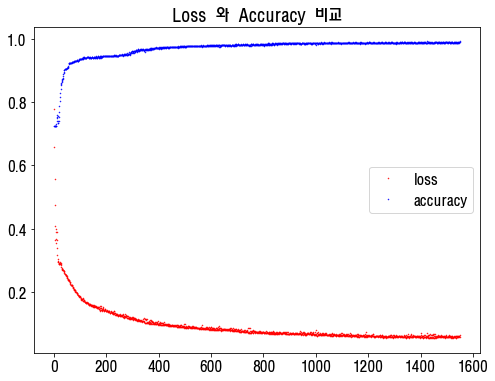

In [21]:
x_len = np.arange(len(acc))

plt.figure(figsize=(8,6))
font_path = 'c:/windows/fonts/HMFMMUEX.TTC'
font_name = matplotlib.font_manager.FontProperties(fname=font_path).get_name()
plt.rc('font', family=font_name, size=14)

plt.title('Loss 와 Accuracy 비교')
plt.plot(x_len, vloss, '.', c='red', markersize=1, label='loss')
plt.plot(x_len, acc, '.', c='blue', markersize=1, label='accuracy')
plt.legend()